# U.S. Medical Insurance Costs

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [67]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [68]:
df['region'].nunique()

4

# Analyzing the relationship between age and charges

In [69]:
# calculate the average age of patients and the average charges
average_age = round(df['age'].mean(), 2)
average_charge = round(df['charges'].mean(), 2)
print(f"The average age of patients is {average_age}")
print(f"The average charge which is paid by a patient is {average_charge} $")

The average age of patients is 39.21
The average charge which is paid by a patient is 13270.42 $


In [70]:
age_charges_df = df[['age', 'charges']].copy().sort_values(by='age')
age_charges_df

,age,charges
1248,18,1633.96180
482,18,1622.18850
492,18,2196.47320
525,18,11482.63485
529,18,1708.00140
...,...,...
398,64,14988.43200
335,64,13822.80300
378,64,16455.70785
1265,64,26926.51440


In [71]:
# groupby age
group_age_df = age_charges_df.groupby('age')['charges'].sum().reset_index()
group_age_df.head()

,age,charges
0,18,488949.011389
1,19,662857.834750
2,20,294631.234350
3,21,132453.001230
4,22,280362.118450


In [72]:
# split age into different age groups 
bins = [17, 25, 35, 45, 55, 65]
group_age_df['age_groups'] = pd.cut(group_age_df['age'], bins=bins)
age_df = group_age_df.groupby('age_groups').agg({'charges': 'sum'}).reset_index()
age_df

,age_groups,charges
0,"(17, 25]",2.780627e+06
1,"(25, 35]",2.812704e+06
2,"(35, 45]",3.562280e+06
3,"(45, 55]",4.540280e+06
4,"(55, 65]",4.059935e+06


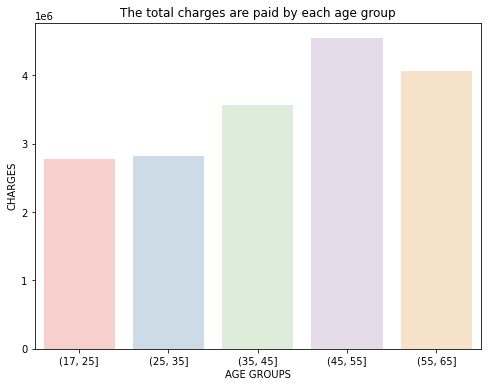

In [73]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data= age_df, x = 'age_groups', y='charges', alpha=0.7)
ax.set(title='The total charges are paid by each age group', xlabel= 'AGE GROUPS', ylabel = 'CHARGES');

- From the above bar chart we found that the group age from 45 to 55 pays the hugest charges; followed by the group from 55 to 65 years old
- Some reasons why the older tend to pay more for the insurance charges:
    - Group age 45 to 55: Most of them have obtain some success in their career. They have already had a stable life. So they are ready to pay more money to get a healthy life and get a best quality of life.
    - Group age 55 to 65: in this age, they may have some healthy problems. Many of them can be in retirement, so their income decreases. But they pay the most attention to their health. 
    - Group age 35 to 45: Their income is increasing rapidly, because they are on the road of developing their career. Besides some attentions to luxury products (like house, car,...) and entertainment services, they are starting to expense more money to healthy services (products).
    - Group age 17 to 35: They are still students or they haven't got a good paid job. They are still young. So most of them don't really care more about their health. Instead of paying money for insurances, they can want to pay for some adventure trips.
    
- **--> So the insurance companies should pay much attention to their target customer groups ( group age 45 to 55 and group age 55 to 65). However, they can also have some marketing strategies which focus on the group age 35 to 45, so that they can expand their market. But for this group, i think the most important thing in marketing is to heighten their awaremess of health care**

# Analyzing the relationship between sex, region and charges

In [74]:
sex_charges = df[['sex', 'charges']].copy()
groupby_sex = sex_charges.groupby(['sex']).agg({'charges' : 'mean'}).reset_index()
groupby_sex

,sex,charges
0,female,12569.578844
1,male,13956.751178


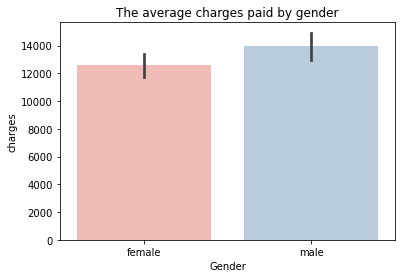

In [75]:
sns.barplot(data = sex_charges, x = 'sex', y = 'charges')
plt.xlabel('Gender')
plt.title('The average charges paid by gender');

- From this bar chart, we can see easily that male tend to pay more insurances charges than female.

In [76]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


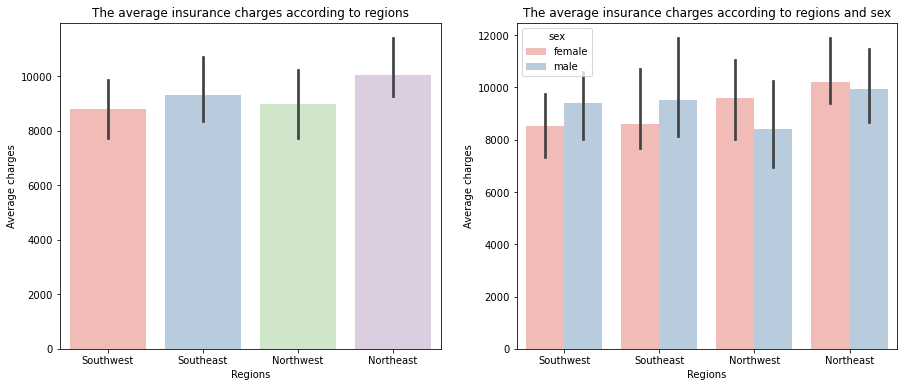

In [77]:
sns.set_palette('Pastel1')
plt.figure(figsize = (15, 6))
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.barplot(data = df, x = 'region', y = 'charges', estimator = np.median)
ax1.set_xticks([0, 1, 2, 3])
ax1.set_xticklabels(['Southwest', 'Southeast', 'Northwest', 'Northeast'])
ax1.set(title = 'The average insurance charges according to regions', xlabel = 'Regions', ylabel = 'Average charges')

ax2 = plt.subplot(1, 2, 2)
ax2 = sns.barplot(data = df, x = 'region', y = 'charges', estimator = np.median, hue = 'sex')
ax2.set_xticks([0, 1, 2, 3])
ax2.set_xticklabels(['Southwest', 'Southeast', 'Northwest', 'Northeast'])
ax2.set(title = 'The average insurance charges according to regions and sex', xlabel = 'Regions', ylabel = 'Average charges')
plt.show()

- From these above bar charts, we come up with some conclusions as below:
    - Northeast is the area where contributes the most insurance charges; followed by Southeast
    - In Northeast and  Northwest women pay much insurance than men. In contrast, men in Southwest and  Southeast contribute much insurance charges than women.

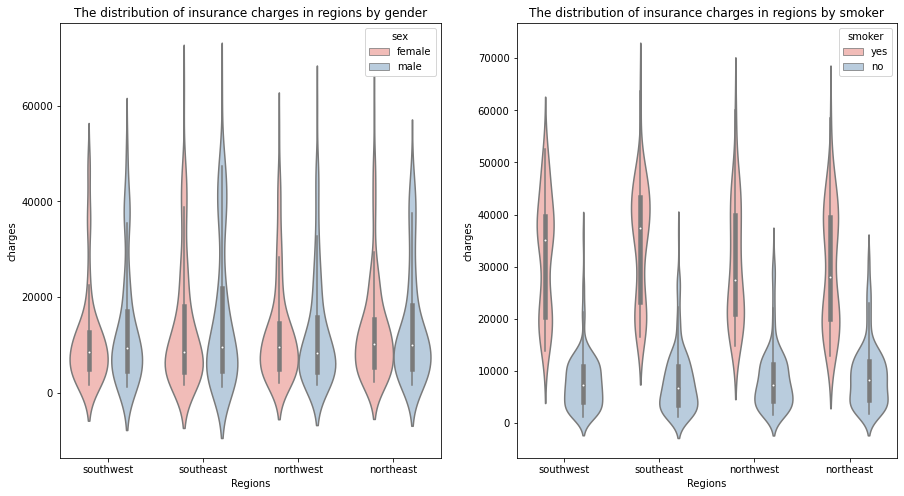

In [78]:
plt.figure(figsize = (15, 8))
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data = df, x = 'region', y = 'charges', hue = 'sex')
ax1.set_title('The distribution of insurance charges in regions by gender')
ax1.set_xlabel('Regions')


ax2 = plt.subplot(1, 2, 2)
ax2 = sns.violinplot(data = df, x = 'region', y = 'charges', hue = 'smoker')
ax2.set_title('The distribution of insurance charges in regions by smoker')
ax2.set_xlabel('Regions')

plt.show()


- From the violin plot "The distribution of insurance charges in regions by smoker" we can realize that smoker contribute much insurance charges than non-smoker.
- There isn't much difference in insurance charge distribution between men and women. Most men and women pay around the median amount of charges

# Building Models to predict the charge one person should pay 

## A. Preprocessing

## 1. Splitting data into X and y

In [161]:
X = df.drop(['charges'], axis = 1)
y = df['charges']
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [162]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## 2. Taking care of missing data, if any

In [163]:
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
#imputer.fit(X.loc[:, ['age', 'bmi', 'children']])
#X.loc[:, ['age', 'bmi', 'children']] = imputer.transform(X.loc[:, ['age', 'bmi', 'children']])

## 3. Encoding categorical data

In [82]:
pip install --upgrade category_encoders

Note: you may need to restart the kernel to use updated packages.


In [164]:
# Using binary encoding
from category_encoders import BinaryEncoder
X_encode = BinaryEncoder(cols = ['sex', 'smoker','region'], drop_invariant = True).fit_transform(X)

In [165]:
X_encode

,age,sex_0,sex_1,bmi,children,smoker_0,smoker_1,region_0,region_1,region_2
0,19,0,1,27.900,0,0,1,0,0,1
1,18,1,0,33.770,1,1,0,0,1,0
2,28,1,0,33.000,3,1,0,0,1,0
3,33,1,0,22.705,0,1,0,0,1,1
4,32,1,0,28.880,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,0,30.970,3,1,0,0,1,1
1334,18,0,1,31.920,0,1,0,1,0,0
1335,18,0,1,36.850,0,1,0,0,1,0
1336,21,0,1,25.800,0,1,0,0,0,1


## 4. Splitting the dataset into the Training set and Test set

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encode, y, test_size = 0.2, random_state = 0)

In [167]:
X_train

,age,sex_0,sex_1,bmi,children,smoker_0,smoker_1,region_0,region_1,region_2
621,37,1,0,34.100,4,0,1,0,0,1
194,18,1,0,34.430,0,1,0,0,1,0
240,23,0,1,36.670,2,0,1,1,0,0
1168,32,1,0,35.200,2,1,0,0,0,1
1192,58,0,1,32.395,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
763,27,1,0,26.030,0,1,0,1,0,0
835,42,1,0,35.970,2,1,0,0,1,0
1216,40,1,0,25.080,0,1,0,0,1,0
559,19,1,0,35.530,0,1,0,0,1,1


In [168]:
X_test

,age,sex_0,sex_1,bmi,children,smoker_0,smoker_1,region_0,region_1,region_2
578,52,1,0,30.200,1,1,0,0,0,1
610,47,0,1,29.370,1,1,0,0,1,0
569,48,1,0,40.565,2,0,1,0,1,1
1034,61,1,0,38.380,0,1,0,0,1,1
198,51,0,1,18.050,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
1084,62,0,1,30.495,2,1,0,0,1,1
726,41,1,0,28.405,1,1,0,0,1,1
1132,57,1,0,40.280,0,1,0,1,0,0
725,30,0,1,39.050,3,0,1,0,1,0


In [169]:
y_train

621     40182.24600
194      1137.46970
240     38511.62830
1168     4670.64000
1192    13019.16105
           ...     
763      3070.80870
835      7160.33030
1216     5415.66120
559      1646.42970
684      4766.02200
Name: charges, Length: 1070, dtype: float64

In [170]:
y_test

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
1084    15019.76005
726      6664.68595
1132    20709.02034
725     40932.42950
963      9500.57305
Name: charges, Length: 268, dtype: float64

## 5. Feature scaling

In [171]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train.loc[:, ['age', 'bmi', 'children']] = sc.fit_transform(X_train.loc[:, ['age', 'bmi', 'children']])
#X_test.loc[:, ['age', 'bmi', 'children']] = sc.fit_transform(X_test.loc[:, ['age', 'bmi', 'children']])

In [172]:
#X_train

In [173]:
X_test

,age,sex_0,sex_1,bmi,children,smoker_0,smoker_1,region_0,region_1,region_2
578,52,1,0,30.200,1,1,0,0,0,1
610,47,0,1,29.370,1,1,0,0,1,0
569,48,1,0,40.565,2,0,1,0,1,1
1034,61,1,0,38.380,0,1,0,0,1,1
198,51,0,1,18.050,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
1084,62,0,1,30.495,2,1,0,0,1,1
726,41,1,0,28.405,1,1,0,0,1,1
1132,57,1,0,40.280,0,1,0,1,0,0
725,30,0,1,39.050,3,0,1,0,1,0


## B. Building models

### 1. Multiple Linear Regression Model

In [174]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### 2. Predicting the test set result

In [175]:
y_pred = regressor.predict(X_test)

### 3. Visualizing y_test and y_pred

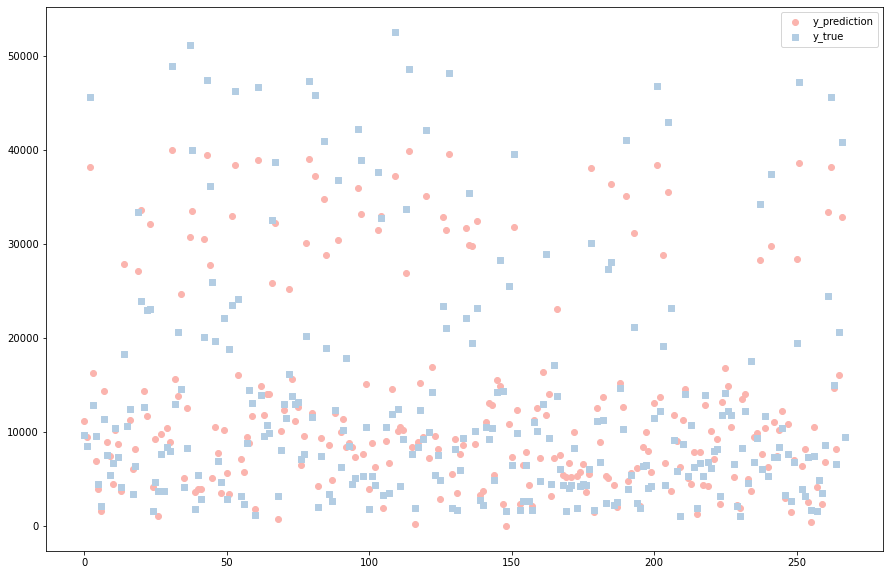

In [176]:
x = list(range(0, len(y_pred)))
plt.figure(figsize = (15, 10))
plt.scatter(x, y_pred, marker = 'o')
plt.scatter(x, y_test, marker = 's')
plt.legend(['y_prediction', 'y_true'])

### 4. Evaluating the model performance

In [177]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7999876970680433